In [1]:
#Clustering
from sklearn.datasets import make_blobs

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0) #cluster_std , captures the variance of data in cluster


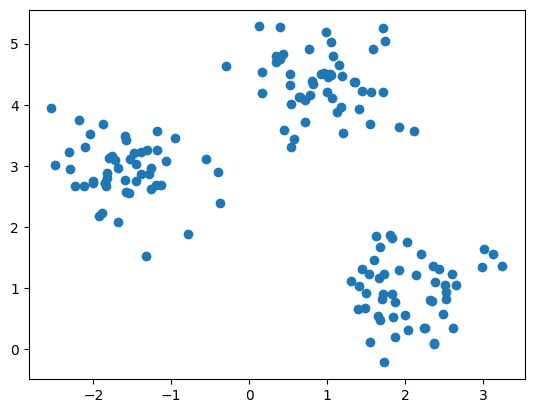

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.cluster import KMeans

In [5]:
km=KMeans(n_clusters = 8, init = 'random',n_init = 10,tol = 0.0001,max_iter = 300, random_state = 0)  #k is the most important hyperparameter

In [6]:
km.fit(X)

KMeans(init='random', n_init=10, random_state=0)

In [7]:
km.labels_

array([3, 7, 7, 7, 5, 2, 2, 5, 4, 2, 3, 0, 4, 7, 7, 4, 4, 5, 4, 5, 7, 3,
       6, 2, 0, 5, 3, 6, 4, 1, 4, 4, 0, 4, 7, 1, 3, 1, 7, 2, 0, 4, 7, 5,
       3, 5, 0, 6, 0, 6, 1, 2, 2, 5, 3, 0, 7, 3, 0, 6, 4, 0, 4, 4, 6, 0,
       2, 1, 7, 2, 6, 1, 3, 2, 1, 7, 6, 4, 0, 2, 1, 5, 7, 2, 3, 3, 3, 4,
       4, 5, 5, 7, 1, 2, 1, 6, 4, 4, 1, 1, 1, 3, 4, 5, 1, 2, 4, 6, 2, 7,
       0, 7, 1, 0, 2, 4, 2, 6, 0, 4, 7, 3, 7, 7, 1, 1, 0, 5, 4, 0, 0, 0,
       1, 4, 4, 0, 7, 4, 1, 4, 6, 6, 5, 5, 0, 4, 4, 4, 5, 5])

In [8]:
km.cluster_centers_

array([[-1.12403887,  2.83464449],
       [ 1.64408885,  1.24937968],
       [ 1.01385898,  4.83077279],
       [ 2.62545249,  1.25500766],
       [-1.90852376,  2.98085311],
       [ 2.07452049,  0.39766961],
       [ 1.46197452,  3.97525547],
       [ 0.52034918,  4.19544488]])

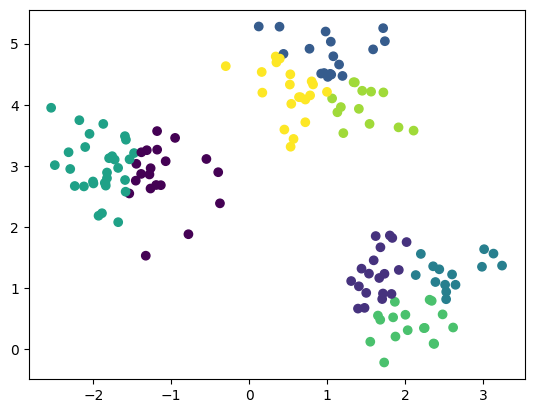

In [9]:
plt.scatter(X[:,0],X[:,1],c=km.labels_)

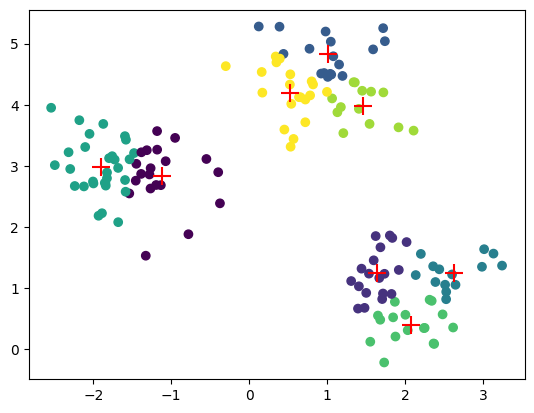

In [10]:
plt.scatter(X[:,0],X[:,1],c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',s=150,c='r')

In [11]:
objs_for_all_k= []
for k in range(1,11):
    km=KMeans(n_clusters=k,init='random',n_init=10,max_iter=300,tol=0.0001,random_state=0)
    km.fit(X)
    objs_for_all_k.append(km.inertia_)

Text(0, 0.5, 'obj')

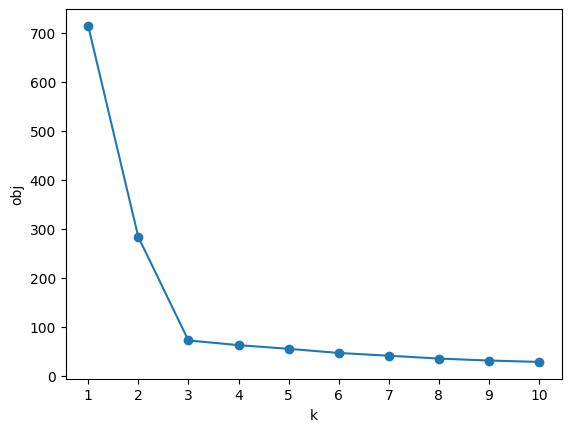

In [12]:
plt.plot(range(1,11),objs_for_all_k,'o-')
plt.xlabel('k')
plt.xticks(range(1,11))
plt.ylabel('obj')

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(X,km.labels_)

0.5848706144251782

In [17]:
SS=[]
for k in range(2,11):
    km=KMeans(n_clusters=k,init='random',n_init=10,max_iter=300,tol=0.0001,random_state=0)
    km.fit(X)
    SS.append(silhouette_score(X,km.labels_))

Text(0, 0.5, 'SS')

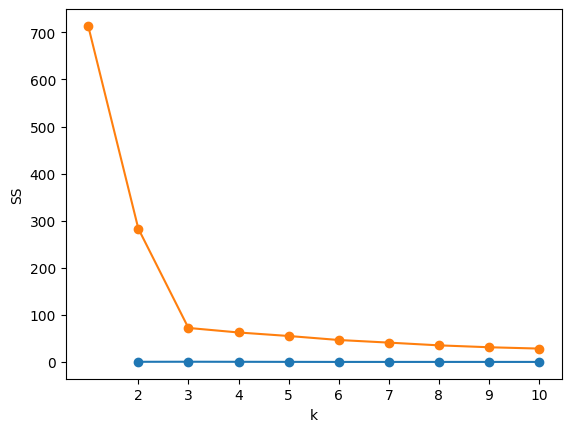

In [18]:
plt.plot(range(2,11),SS,'o-')
plt.plot(range(1,11),objs_for_all_k,'o-')
plt.xlabel('k')
plt.xticks(range(2,11))
plt.ylabel('SS')

In [19]:
#apyori  #Association Rule Mining
from apyori import apriori

In [20]:
dataset = [['Milk', 'Bread', 'Eggs'],
           ['Milk', 'Bread'],
           ['Milk', 'Eggs'],
           ['Milk', 'Bread', 'Veggies'],
           ['Bread', 'Eggs']]

In [21]:
rules=apriori(dataset,min_support = 0.4,min_confidence = 0.5,min_lift=1.0)

In [22]:
results1=list(rules)

In [23]:
results1

[RelationRecord(items=frozenset({'Bread'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'Eggs'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Eggs'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'Milk'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Milk'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'Milk', 'Bread'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Milk', 'Bread'}), confidence=0.6, lift=1.0)])]

In [24]:
for result in results1:
    if len(result.items)>=2:
        items= [X for x in result.items]
        print(items)
        print(result.support)
        for each in result.ordered_statistics:
            print(each.confidence)
            print(each.lift)

[array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625

In [25]:
#Demo of PCA (Principal Component Analysis)

from sklearn.datasets import load_iris


In [26]:
X,y = load_iris(return_X_y = True, as_frame= True)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
std=StandardScaler()
X_std = std.fit_transform(X)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca=PCA(n_components= 4)

In [31]:
pca_features=pca.fit_transform(X_std)

In [32]:
print('Shape before PCA',X_std.shape)
print('shape after PCA',pca_features.shape)


Shape before PCA (150, 4)
shape after PCA (150, 4)


In [33]:
import pandas as pd

In [34]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [35]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [36]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [37]:
pca = PCA(n_components=4)
X_pca=pca.fit_transform(X_std)

In [38]:

print(X_pca)

[[-2.26470281e+00  4.80026597e-01 -1.27706022e-01 -2.41682039e-02]
 [-2.08096115e+00 -6.74133557e-01 -2.34608854e-01 -1.03006775e-01]
 [-2.36422905e+00 -3.41908024e-01  4.42014848e-02 -2.83770534e-02]
 [-2.29938422e+00 -5.97394508e-01  9.12901063e-02  6.59555596e-02]
 [-2.38984217e+00  6.46835383e-01  1.57381957e-02  3.59228133e-02]
 [-2.07563095e+00  1.48917752e+00  2.69682944e-02 -6.60818022e-03]
 [-2.44402884e+00  4.76441976e-02  3.35470401e-01  3.67755572e-02]
 [-2.23284716e+00  2.23148073e-01 -8.86954979e-02  2.46120962e-02]
 [-2.33464048e+00 -1.11532768e+00  1.45076864e-01  2.68592208e-02]
 [-2.18432817e+00 -4.69013561e-01 -2.53765567e-01  3.98992877e-02]
 [-2.16631010e+00  1.04369065e+00 -2.68681102e-01 -1.67313672e-02]
 [-2.32613087e+00  1.33078335e-01  9.37592444e-02  1.33483413e-01]
 [-2.21845090e+00 -7.28676165e-01 -2.30911237e-01 -2.42503814e-03]
 [-2.63310070e+00 -9.61506729e-01  1.80796084e-01  1.92155336e-02]
 [-2.19874060e+00  1.86005711e+00 -4.72900998e-01 -1.94731769e

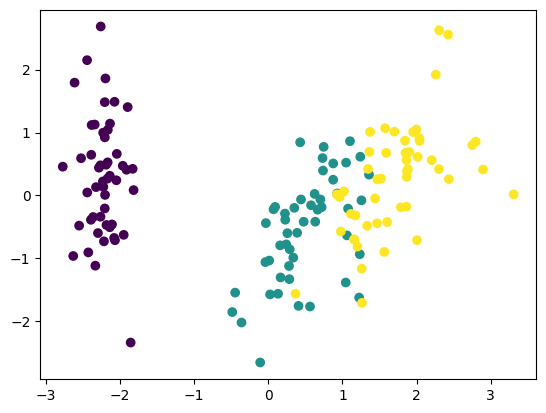

In [39]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

In [40]:
pca2=PCA(0.95)

In [41]:
X_pca2=pca2.fit_transform(X_std)

In [42]:
pca2.n_components_

2

In [43]:
pca2.explained_variance_ratio_.sum()

0.9581320720000164

In [44]:
from nltk.tokenize import sent_tokenize

In [45]:
nltk.download('all')

NameError: name 'nltk' is not defined

In [3]:
sent_tokenize('I am studying data science.What are you studying?Data Science is interesting')

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ACER/nltk_data'
    - 'c:\\Users\\ACER\\Desktop\\VM\\.venv\\nltk_data'
    - 'c:\\Users\\ACER\\Desktop\\VM\\.venv\\share\\nltk_data'
    - 'c:\\Users\\ACER\\Desktop\\VM\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\ACER\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [5]:
from nltk.stem import PorterStemmer

In [46]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
porter=PorterStemmer()

NameError: name 'PorterStemmer' is not defined

In [7]:
token=['friend','friendship','friends','friendships']

In [10]:
tokens=['organize','organizes','organizing']
for each in tokens:
    print(porter.stem(each))

organ
organ
organ


In [11]:
from nltk.stem import WordNetLemmatizer

In [48]:
lemmatizer=WordNetLemmatizer()

NameError: name 'WordNetLemmatizer' is not defined

In [49]:
words=['rocks','corpora','better']
for each in words:
    print(lemmatizer.lemmatize(each))

NameError: name 'lemmatizer' is not defined

In [ ]:
import nltk
nltk.download('average_perception_tagger')
pos_tag(word_list)

In [ ]:
#CountVectorizer

In [7]:
text_documents = ['This natural physical landmass in South Asia is the dry-land portion of the Indian Plate, which has been relatively isolated from the rest of Eurasia',' In the west it is bounded by parts of the mountain ranges of Hindu Kush, Spīn Ghar (Safed Koh), Sulaiman Mountains, Kirthar Mountains, Brahui range, and Pab range among others,[43] with the Western Fold Belt along the border (between the Sulaiman Range and the Chaman Fault) is the western boundary of the Indian Plate,[47] where, along the Eastern Hindu Kush, lies the Afghanistan–Pakistan border.','In terms of modern geopolitical boundaries, the subcontinent constitutes Bangladesh, Bhutan, India, Nepal, and Pakistan, besides, by convention, the island country of Sri Lanka and other nearby island nations of the Indian Ocean, such as Maldives and the British Indian Ocean Territory.']

In [9]:
text_documents[2]

'In terms of modern geopolitical boundaries, the subcontinent constitutes Bangladesh, Bhutan, India, Nepal, and Pakistan, besides, by convention, the island country of Sri Lanka and other nearby island nations of the Indian Ocean, such as Maldives and the British Indian Ocean Territory.'

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
c_vec = CountVectorizer()

In [12]:
X_c = c_vec.fit_transform(text_documents)

In [13]:
X_c

<3x87 sparse matrix of type '<class 'numpy.int64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [16]:
X_c.toarray

<bound method _cs_matrix.toarray of <3x87 sparse matrix of type '<class 'numpy.int64'>'
	with 100 stored elements in Compressed Sparse Row format>>

In [15]:
X_c.toarray().shape

(3, 87)

In [17]:
len(c_vec.vocabulary_)

87

In [50]:
#Vecotrizer, various kinds of vectorizer
#Convert the text data to numerical data
#Vectorizers

#Count vectorizer
#Hashing Vectorizer

from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
?CountVectorizer

#Countvectorizer limitation - It'll have huge dimensionality, if there is a word which is appearing in all the documents, India will appear again and again, giving high weight to frequesnt words.
#Limitation -Giving weightage to frequent words

In [52]:
#Hashing Vectorizer
  #Murmur hash
text_documents = ['Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.','Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human genetic diversity.','Settled life emerged on the subcontinent in the western margins of the Indus river basin 9,000 years ago, evolving gradually into the Indus Valley Civilisation of the third millennium BCE.','By 1200 BCE, an archaic form of Sanskrit, an Indo-European language, had diffused into India from the northwest. Its evidence today is found in the hymns of the Rigveda.']


In [53]:
from sklearn.feature_extraction.text import HashingVectorizer

In [54]:
h_vec = HashingVectorizer(n_features=50)

In [57]:
X_h=h_vec.fit_transform(text_documents)

In [58]:
X_h

<4x50 sparse matrix of type '<class 'numpy.float64'>'
	with 77 stored elements in Compressed Sparse Row format>

In [59]:
X_h.toarray()

array([[ 0.        ,  0.        , -0.23570226,  0.        , -0.23570226,
         0.        ,  0.        ,  0.23570226, -0.23570226,  0.        ,
         0.        , -0.23570226,  0.        ,  0.        ,  0.        ,
        -0.23570226,  0.        ,  0.        ,  0.        , -0.23570226,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.23570226,
        -0.23570226, -0.23570226,  0.        ,  0.        ,  0.47140452,
         0.        ,  0.23570226,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.23570226,
         0.        ,  0.23570226,  0.        , -0.23570226,  0.        ],
       [ 0.        , -0.16222142,  0.        ,  0.        ,  0.        ,
         0.        ,  0.16222142, -0.16222142, -0.16222142, -0.16222142,
        -0.16222142,  0.        ,  0.16222142,  0.        , -0.16222142,
         0.        ,  0.        , -0.16222142,  0.

In [61]:
X_h.shape

(4, 50)

In [62]:
print(X_h[0])

  (0, 2)	-0.23570226039551587
  (0, 4)	-0.23570226039551587
  (0, 7)	0.23570226039551587
  (0, 8)	-0.23570226039551587
  (0, 11)	-0.23570226039551587
  (0, 15)	-0.23570226039551587
  (0, 19)	-0.23570226039551587
  (0, 29)	0.23570226039551587
  (0, 30)	-0.23570226039551587
  (0, 31)	-0.23570226039551587
  (0, 34)	0.47140452079103173
  (0, 36)	0.23570226039551587
  (0, 44)	-0.23570226039551587
  (0, 46)	0.23570226039551587
  (0, 48)	-0.23570226039551587


In [ ]:
#Disadvantages of Hashing Vectorizer
#Memory occupancy

In [67]:
#3rd kind of vectorizer
#TF-ID Vectorizer
#Term Frequency-Inverse Document Frequency
#tfidf

#TF-IDF = TF x IDF   #After applying TF-IDF, dimensionality remains the same TF(t,d) #t appears in the doc d

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

data= ['The sky is blue','The sun is bright','We can see the sun shining, the bright sun']

tfidf_v=TfidfVectorizer()
count_v=CountVectorizer()


In [68]:
tfidf_X=tfidf_v.fit_transform(data)
count_X=count_v.fit_transform(data)


In [69]:
count_v.get_feature_names_out()

array(['blue', 'bright', 'can', 'is', 'see', 'shining', 'sky', 'sun',
       'the', 'we'], dtype=object)

In [70]:
tfidf_v.get_feature_names_out()

array(['blue', 'bright', 'can', 'is', 'see', 'shining', 'sky', 'sun',
       'the', 'we'], dtype=object)

In [72]:
count_X.toarray()

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 2, 2, 1]], dtype=int64)

In [74]:
#Sentiment Analysis , oldest model of NLP, ist very commonly used

from textblob import TextBlob

In [75]:
res=TextBlob('The food was great!')

In [77]:
res.sentiment   #Polarity =1 (positive),polarity=-1(Negative),Polarity=0(Neutral)

Sentiment(polarity=1.0, subjectivity=0.75)

In [78]:
res=TextBlob('The food was worse!')
res.sentiment

Sentiment(polarity=-0.5, subjectivity=0.6)

In [80]:
res.sentiment

Sentiment(polarity=-0.5, subjectivity=0.6)

In [81]:
res=TextBlob('I don\'t know how food was')
res.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [83]:
res=TextBlob('The book was very bad!')
res.sentiment

Sentiment(polarity=-1.0, subjectivity=0.8666666666666667)

In [84]:
res=TextBlob('The book is worth buying!')
res.sentiment

Sentiment(polarity=0.375, subjectivity=0.1)

In [85]:
res=TextBlob('Its useless book')
res.sentiment

Sentiment(polarity=-0.5, subjectivity=0.2)

In [87]:
res=TextBlob('I don\'t know how book was')
res.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [91]:
#VADER
#Valence Aware Dictionary for sentiment reasoning

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [92]:
analyzer=SentimentIntensityAnalyzer()
res=analyzer.polarity_scores('The food was great')
res

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [94]:
analyzer=SentimentIntensityAnalyzer()
res=analyzer.polarity_scores('I do not know how food was')
res

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [97]:
from flair.models import TextClassifier
from flair.data import Sentence

ModuleNotFoundError: No module named 'flair'

In [96]:
Classifier=TextClassifier.load('en-sentiment')
sent=Sentence('The food was great')
classifier.predict(sent)


NameError: name 'TextClassifier' is not defined